# **Projet Apprentissage supervisé**
---
**Douaa BENHADDOUCHE - Lilia HARIRECHE - Antoine RODRIGUEZ** - MLDS FA

# **Introduction**

L'apprentissage supervisé est une panoplie de techniques qui visent à résoudre deux problématiques: la regression et le classement. Dans ce travail nous nous intéressons au classement et nous allons appliquer différents techniques sur des données réelles de deux types : bancaires et relationnelles.

#**Description générales des méthodes utilisées**

**Random Forest:**\
il est constitué d'un ensemble d'arbres de décision indépendants. \
Chaque arbre dispose d'une vision parcellaire du problème du fait d'un double tirage aléatoire :
* *tree bagging*: un tirage aléatoire avec remplacement sur les observations. \
* *feature sampling*: un tirage aléatoire sur les variables. \
A la fin, tous ces arbres de décisions indépendants sont assemblés. La prédiction faite par le random forest est alors la moyenne/vote majoritaire de tous les arbres. \

**SVM:** \
SVM ou Support Vector Machine est un modèle linéaire pour les problèmes de classification et de régression. Il peut résoudre des problèmes ***linéaires*** et ***non linéaires*** et fonctionne bien pour de nombreux problèmes pratiques. \
Ce que font les SVM est de trouver une ligne de séparation (ou hyperplan) entre les données de deux classes. C'est un algorithme qui prend les données en entrée et sort une ligne qui sépare ces classes si possible.

**Bayesien Naif:** \
La méthode de classification naïve bayésienne est un algorithme d'apprentissage supervisé. Parmi ces atouts, on citera son apprentissage rapide qui ne nécessite pas un gros volume de données et son extrême rapidité d'exécution comparé à d'autres méthodes plus complexes. \
A la base cette classification se trouve le théorème de Bayes avec l'hypothèse simplificatrice, dite naïve, d'indépendance entre toutes les paires de variables, mais malgré la forte hypothèse simplificatrice d'indépendance des variables, la méthode obtient des résultats remarquables dans de nombreuses applications. \
Historiquement, cette méthode fut utilisée pour la ***classification de documents et l'élaboration de filtres anti-spam***. Aujourd'hui, c'est un algorithme renommé dont les applications peuvent être rencontrées dans de nombreux domaines.

**Linear Regression:** \
La régression linéaire est un type d'analyse prédictive basique et couramment utilisé. L'idée générale de cette méthode est de modéliser la relation entre entre la cible (une varaible dépendante) et un ou plusieurs prédicteurs (variables indépendantes) tout en ajustant une équation linéaire aux données observées. \
Il existe plusieurs types de régression linéaire(simple, multiple, logistic,...), et dans le cadre de ce projet nous allons opter pour la regression linéaire simple. \

**XGboost:** \
C'est une méthode d'aggrégation de modèles simples et faibles pour fournir une meilleure prédiction. Contrairement aux Random Forest, XGboost travaille de manière séquentielle, ce qui la rend plus lente, mais elle permet à l’algorithme de s’améliorer par capitalisation par rapport aux exécutions précédentes. Elle est appelée gradient boosting parce qu’elle utilise un algorithme de descente de gradient pour minimiser la perte lors de l’ajout de nouveaux modèles. \
Elle se base sur une approche pragmatique qui permet de gérer des problèmes de régression comme de classification. La méthode est aussi appropriée pour un classement binaire de ***classes déséquilibrées***, car elle offre un moyen d’ajuster l’algorithme d'entrainement pour accorder plus d’attention à la mauvaise classification de la classe minoritaire grâce au paramètre ***scale_pos_weight***. \

**KNN** \
L'algorithme des k-plus proches voisins est un algorithme d'apprentissage automatique supervisé simple et facile à mettre en œuvre qui peut être utilisé pour résoudre des problèmes de classification et de régression. Les étapes de l'algorithme à suive sont les suivantes: \
* Sélectionner le nombre K de voisins,
* Calculer la distance,
* Prendre les K voisins les plus proches selon la distance calculée.
* Parmi ces K voisins, compter le nombre de points appartenant à chaque catégorie.
* Attribuer le nouveau point à la catégorie la plus présente parmi ces K voisins. \

**LDA:** \
C'est une des techniques de réduction dimensionnelle les plus utilisées. Elle sert à un but très spécifique, qui est de projeter des caractéristiques qui existent dans un espace de haute dimension sur l’espace à une dimension inférieure. LDA est considérée comme l’une des méthodes  les plus simples et les plus efficaces dans l'apprentissage supervisé, elle est utilisé dans  les applications de regression mais aussi de classement. La technique originale a été décrite comme une technique de classement binaire La version multi-classe a été plus tard généralisée comme analyse discriminante multiple. L’avantage de LDA est qu’elle utilise les informations des variables pour créer un nouvel axe qui à son tour minimise la variance et maximise la distance de classe des deux variables.

**QDA:** \
C'est une variante de LDA utilisée quand la séparation des classes n'est pas linéaire. Dans cette technique une matrice de covariance individuelle est estimée pour chaque classe d’observations. La QDA est particulièrement utile si l’on sait au préalable que les classes individuelles présentent des covariances distinctes. Un inconvénient de la QDA est qu’elle ne peut pas être utilisée comme technique de réduction dimensionnelle.
Nous allons aussi évaluer LDA et QDA avec la validation croisée.




#**Librairies**

In [ ]:
import os
import tempfile
import scipy.io
import pandas as pd
import numpy as np
import sklearn
import copy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump, load
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# **Application 1 : Credit Fraud**

##**Données**

#####**Prétraitement des données 'creditcard.csv'**

In [ ]:
!gdown --id 1g7TJNYiRkPINopgOqfIGQSLKJEYSdvPC -q

In [2]:
raw_df = pd.read_csv('/content/creditcard.csv')

df_credit = raw_df.copy(deep=True)
df_credit.pop('Time')  # we don't know much about this feature
df_credit['Log Ammount'] = np.log(df_credit.pop('Amount')+0.01)  # since the feature amount is variable, we reduce its range with log

df_credit.to_csv('/content/credit_card.csv', index = False, header=True)

NameError: ignored

#####**chargement du jeu de données 'credit_card.csv'** 

In [ ]:
!gdown --id 147uT4wS0cApPCL3v7HrsQvpSlD845j5s -q

Le jeu de données `credit_card` prétraité à l'allure suivante et chacunes des variables est le résultat d'une analyse en composantes principales.

In [ ]:
df_credit = pd.read_csv('/content/credit_card.csv',error_bad_lines=False)
print(df_credit.shape)
df_credit.head()

(284807, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Ammount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008166
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.993252
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936665
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816322
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248495


#####**Split en ensembles d'apprentissage et de test**

Afin d'appliquer des modèles d'apprentissage supervisé nous aurons besoin de séparer le dataset en un ensemble de test et d'apprentissage, nous comparerons les résultats de chacunes des méthodes sur ce même ensemble de test.

In [ ]:
credit_features = df_credit.copy(deep=True)
credit_labels = credit_features.pop('Class')

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(credit_features,
                                                                            credit_labels,
                                                                            test_size=0.4, 
                                                                            random_state=42)

##**Application des méthodes**

Avant toute chose nous choisirons d'évaluer nos méthodes à l'aide des métriques d'accuracy, de F-measure et de NMI et à l'aide cette fonction.

###**Fonction d'évaluation Accuracy, NMI, F-measure**

In [ ]:
def evaluate(y_true, y_pred, scoring_metric=['accuracy','f1', 'nmi'],
             verbose=True, cm=True):
  
    scores_dict = {'accuracy': accuracy_score,
                   'f1': f1_score,
                   'nmi': normalized_mutual_info_score}

    result_dict = {}
    for score in scoring_metric:
        if score in scores_dict.keys():
            result_dict[score] = scores_dict[score](y_true, y_pred)
        else:
            print('metric {} not implemented yet'.format(score))
        if verbose:
            print("{} score : {:.3f}".format(score, int(result_dict[score]*1000)/1000))
    if cm:
        return result_dict, metrics.confusion_matrix(y_true, y_pred)
    else:
        return result_dict

def plot_confusion(cm):
    print("Confusion matrix : ")
    fig, ax = plt.subplots(figsize=(5,5))
    fig = sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

###**Fonction pour visualiser: Accuracy, NMI, F-measure**

In [ ]:
def plot_metrics(dataframe):
    barWidth = 0.2
    nb_row = len(dataframe.index)
    plt.bar(range(nb_row), 
            np.array(dataframe['accuracy']), 
            width = barWidth,
            color='green')
    plt.bar([x + barWidth for x in range(nb_row)],
            np.array(dataframe['f1']), 
            width = barWidth,
            color='orange')
    plt.bar([x + 2*barWidth for x in range(nb_row)],
            np.array(dataframe['nmi']),
            width = barWidth)
    plt.xticks([r + barWidth / 3 for r in range(nb_row)],
               np.array(dataframe.index),
               rotation = 45)
    plt.legend(['accuracy','f1-score', 'NMI'],
               loc = 'right',
               bbox_to_anchor=(1.28, 0.5),
               title='Metrics')
    plt.title('Score Metrics for each method')
    fig = plt.show()


###**1. Random Forest**

In [ ]:
#create RF model
rf = RandomForestClassifier(n_estimators=500, criterion='gini', 
                               min_samples_leaf=1, min_samples_split=2, 
                               random_state = 42, n_jobs = -1)  #n_jobs = -1 pour le parallélisme

In [ ]:
# Train the model on training data
%%time
rf.fit(train_features, train_labels)

CPU times: user 21min 51s, sys: 734 ms, total: 21min 52s
Wall time: 11min 5s


In [ ]:
#predection on test_set
prediction_test = rf.predict(test_features)

score metrics for test_set:
accuracy score : 0.999
f1 score : 0.862
nmi score : 0.787
----------
Confusion matrix : 


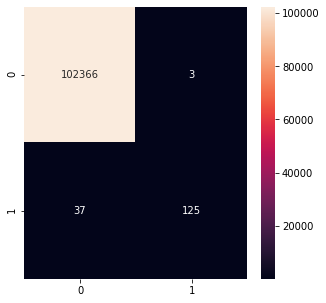

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
result_dict

{'accuracy': 0.9996098740868615,
 'f1': 0.8620689655172414,
 'nmi': 0.7873438072374043}

Afin de comparer les différentes méthodes que nous utiliserons ensuite on peut dès à présent construire un dataframe contenant les scores pour chacunes des méthodes :

In [ ]:
score_metrics = pd.DataFrame(result_dict, index= ['RF'])

In [ ]:
score_metrics

,accuracy,f1,nmi
RF,0.99961,0.862069,0.787344


###**2. Linear SVM**

In [ ]:
#create svm model
linear_svm = svm.SVC(kernel='linear')

In [ ]:
# Train the svm model on training data
%%time
linear_svm.fit(train_features, train_labels)

CPU times: user 21min 46s, sys: 1.8 s, total: 21min 48s
Wall time: 21min 50s


In [ ]:
#predection on test_set
prediction_test = linear_svm.predict(test_features)

score metrics for test_set:
accuracy score : 0.999
f1 score : 0.812
nmi score : 0.706
----------
Confusion matrix : 


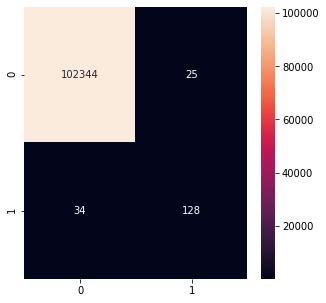

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LinSVM'])], axis=0)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold  ### DELETE
#StratifiedKFold preserve the percentage of samples for each class
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0) 
kf.split(credit_features, credit_labels)
fold_scores = cross_val_score(linear_svm,
                              credit_features,
                              credit_labels,
                              cv=kf,
                              verbose=3,
                              scoring="f1")
  
mean = np.array(fold_scores).mean()
#scores.append(mean)
if verbose:
  print('Fold scores : ', fold_scores)
  print('Mean score : ', mean)

#print(cross_val_score(linear_svm, X, y, cv=2))

###**3. Non Linear SVM**

In [ ]:
#create svm model
noLinear_svm = SVC(kernel='poly', degree = 3)

In [ ]:
# Train the svm model on training data
%%time
noLinear_svm.fit(train_features, train_labels)

CPU times: user 41 s, sys: 77.9 ms, total: 41.1 s
Wall time: 41.2 s


In [ ]:
#predection on test_set
prediction_test = noLinear_svm.predict(test_features)

score metrics for test_set:
accuracy score : 0.999
f1 score : 0.838
nmi score : 0.751
----------
Confusion matrix : 


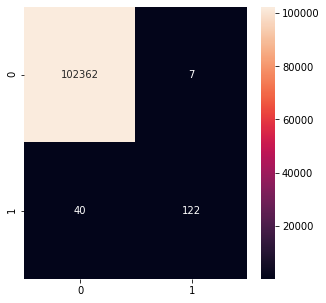

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['NonLinSVM'])], axis=0)

###**4. Bayesien Naïf**

In [ ]:
#model gaussien
gnb = GaussianNB()

In [ ]:
# Train the svm model on training data
%%time
gnb.fit(train_features, train_labels)

CPU times: user 89.1 ms, sys: 15.9 ms, total: 105 ms
Wall time: 110 ms


In [ ]:
#predection on test_set
prediction_test = gnb.predict(test_features)

score metrics for test_set:
accuracy score : 0.978
f1 score : 0.107
nmi score : 0.071
----------
Confusion matrix : 


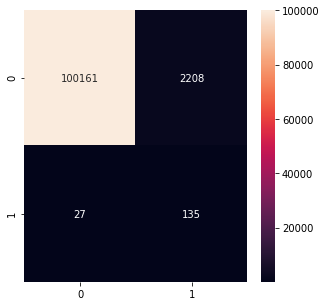

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['GaussianNB'])], axis=0)

### **5. Regression logistique**

In [ ]:
LR = LogisticRegressionCV(cv=5, random_state=0) 
# nous avons choisi d'entrainer le modèle avec une validation croisée pour améliorer les résultats

In [ ]:
# Train the svm model on training data
%%time
LR.fit(train_features, train_labels)

CPU times: user 53.6 s, sys: 21.1 s, total: 1min 14s
Wall time: 37.8 s


In [ ]:
prediction_test = LR.predict(test_features)

score metrics for test_set:
accuracy score : 0.999
f1 score : 0.688
nmi score : 0.572
----------
Confusion matrix : 


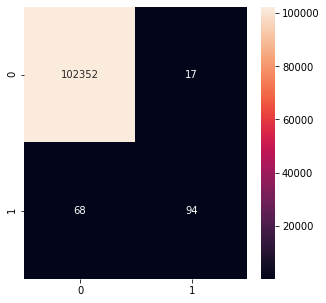

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LR'])], axis=0)

### **6. XGBOOST**

In [ ]:
#create model xgboost
xgb = XGBClassifier()

In [ ]:
# fit model no training data
xgb.fit(train_features,  train_labels)

In [ ]:
prediction_test = xgb.predict(test_features)

score metrics for test_set:
accuracy score : 0.999
f1 score : 0.870
nmi score : 0.789
----------
Confusion matrix : 


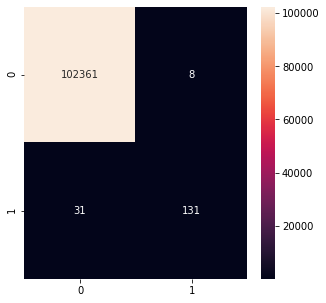

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['XGB'])], axis=0)

### **7. LDA**

In [ ]:
#create model QDA
LDA = LinearDiscriminantAnalysis()

In [ ]:
# fit model no training data
LDA.fit(train_features,  train_labels)

In [ ]:
prediction_test = LDA.predict(test_features)

score metrics for test_set:
accuracy score : 0.999
f1 score : 0.813
nmi score : 0.711
----------
Confusion matrix : 


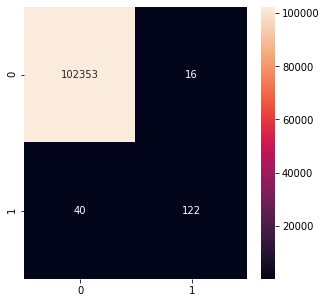

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LDA'])], axis=0)

### **8. QDA**

In [ ]:
#create model QDA
QDA = QuadraticDiscriminantAnalysis()

In [ ]:
# fit model no training data
QDA.fit(train_features, train_labels)

In [ ]:
prediction_test = QDA.predict(test_features)

score metrics for test_set:
accuracy score : 0.976
f1 score : 0.105
nmi score : 0.071
----------
Confusion matrix : 


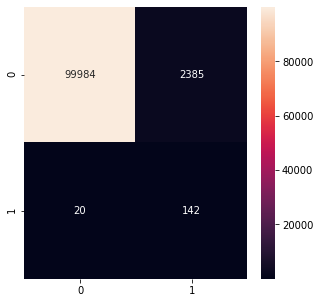

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

En voyant la médiocrité des résultats, on décide d'entrainer le modèle avec une validation croisée.

####**QDA (validation croisée)**

score metrics for test_set:
accuracy score : 0.999
f1 score : 0.789
nmi score : 0.680
----------
Confusion matrix : 


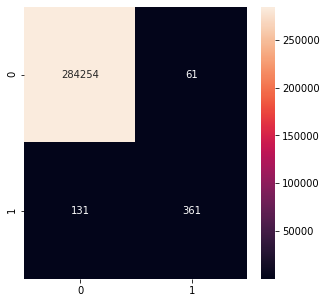

In [ ]:
QDA = LinearDiscriminantAnalysis()
prediction_cv_QDA = cross_val_predict(QDA, credit_features,credit_labels, cv=5)

print("score metrics for test_set:")
result_dict, cm = evaluate(credit_labels, prediction_cv_QDA)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['QDA'])], axis=0)

### **9. kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
prediction_test = knn.predict(test_features)

score metrics for test_set:
accuracy score : 0.999
f1 score : 0.847
nmi score : 0.757
----------
Confusion matrix : 


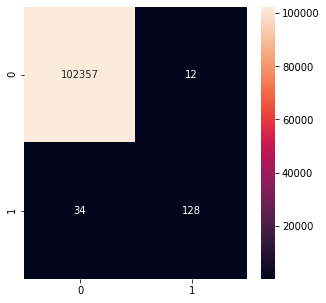

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['kNN'])], axis=0)

### **Evaluation des résultats**

Comparons les résultats obtenus avec les méthodes précédentes 

In [ ]:
score_metrics

,accuracy,f1,nmi
RF,0.999610,0.862069,0.787344
LinSVM,0.999425,0.812698,0.706783
NonLinSVM,0.999542,0.838488,0.751602
GaussianNB,0.978202,0.107784,0.071362
LR,0.999171,0.688645,0.572087
XGB,0.999620,0.870432,0.789928
LDA,0.999454,0.813333,0.711931
QDA,0.999326,0.789934,0.680046
kNN,0.999551,0.847682,0.757228


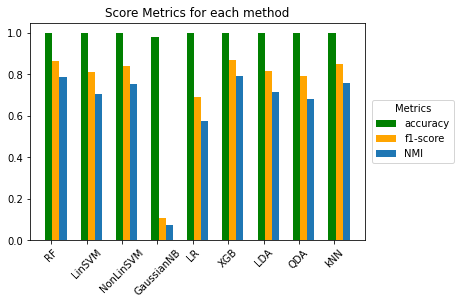

In [ ]:
plot_metrics(score_metrics)

Nous remarquons que toutes les méthodes ont donné une accuracy très élevée, ces résultats sont dûs au déséquilibre des classes, un classificateur dans cette situation peut obtenir un faible taux de classification erronée simplement en choisissant la classe majoritaire; nous remarquons aussi que les deux classifieurs *RF et XGBoost*, ce dernier notamment approprié pour un classement binaire de classes déséquilibrées,  ont donné un taux f1-score et NMI élevé par rapport aux autres méthodes. Ainsi *GaussianNB* avec un taux NMI et f1-score très bas, cette méthode est moins adaptée à ce type de données  

##**Entrainement et Applications des méthodes avec rééchantillonage**

### **Oversampling avec SMOTE**


*   **Synthetic Minority Oversampling TEchnique** (SMOTE) : Cette technique consiste à synthétiser des éléments de la classe minoritaire en créant des voisins à ces derniers. [SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/). Dans cette technique, nous fixons les parametres pour augmenter la taille de la classe minoritaire mais sans atteindre une proportion égale à la classe majoritaire.




In [ ]:
from imblearn.over_sampling import  SMOTE

In [ ]:
smote = SMOTE(0.3)
features, labels = smote.fit_sample(credit_features, credit_labels)

In [ ]:
Counter(labels)

Counter({0: 284315, 1: 85294})

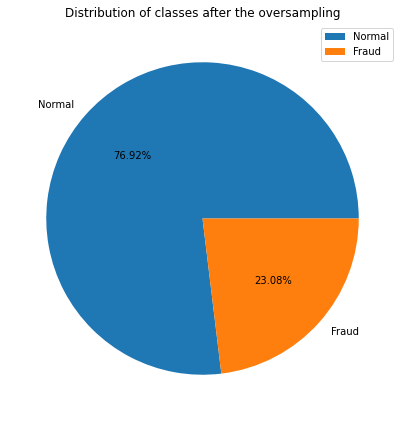

In [ ]:
neg, pos = np.bincount(labels)
plt.figure(figsize=(7,8))
fig = plt.pie([neg, pos], labels = ['Normal', 'Fraud'], autopct=lambda x: str(round(x,2))+'%') 
fig = plt.legend() 
fig = plt.title('Distribution of classes after the oversampling')

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                          labels,
                                                                          test_size=0.2, 
                                                                          random_state=42)  

###**1. Random Forest**

In [ ]:
#create RF model
rf = RandomForestClassifier(n_estimators=500, criterion='gini', 
                               min_samples_leaf=1, min_samples_split=2, 
                               random_state = 42, n_jobs = -1)  #n_jobs = -1 pour le parallélisme

In [ ]:
# Train the model on training data
%%time
rf.fit(train_features, train_labels)

CPU times: user 35min 35s, sys: 1.34 s, total: 35min 36s
Wall time: 18min 4s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#predection on test_set
prediction_test = rf.predict(test_features)

score metrics for test_set:
accuracy score : 0.999
f1 score : 0.999
nmi score : 0.996
----------
Confusion matrix : 


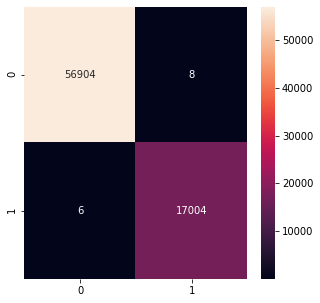

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
result_dict

{'accuracy': 0.9998106111847623,
 'f1': 0.9995885015578154,
 'nmi': 0.9967035113672861}

In [ ]:
score_metrics = pd.DataFrame(result_dict, index= ['RF'])

In [ ]:
score_metrics

,accuracy,f1,nmi
RF,0.999811,0.999589,0.996704


Nous avons essayé d'appliquer Linear SVM et Non Linear SVM de la même manière que les autres méthodes avec la technique SMOTE, mais l'entrainement prend énormement du temps cela est dû peut être à la taille du train set après échantillonage qui est  importante. 

###**4. Bayesien Naïf**

In [ ]:
#model gaussien
gnb = GaussianNB()

In [ ]:
# Train the svm model on training data
%%time
gnb.fit(train_features, train_labels)

CPU times: user 160 ms, sys: 74.8 ms, total: 234 ms
Wall time: 235 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#predection on test_set
prediction_test = gnb.predict(test_features)

score metrics for test_set:
accuracy score : 0.946
f1 score : 0.881
nmi score : 0.632
----------
Confusion matrix : 


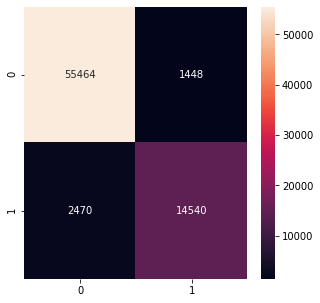

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['GaussianNB'])], axis=0)

### **5. Regression logistique**

In [ ]:
LR = LogisticRegressionCV(cv=5, random_state=0) 
# nous avons choisi d'entrainer le modèle avec une validation croisée pour améliorer les résultats

In [ ]:
# Train the svm model on training data
%%time
LR.fit(train_features, train_labels)

CPU times: user 1min 7s, sys: 25.9 s, total: 1min 33s
Wall time: 47.8 s


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
prediction_test = LR.predict(test_features)

score metrics for test_set:
accuracy score : 0.967
f1 score : 0.925
nmi score : 0.753
----------
Confusion matrix : 


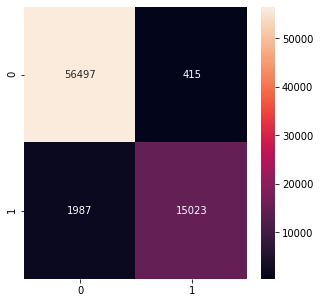

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LR'])], axis=0)

### **6. XGBOOST**

In [ ]:
#create model xgboost
xgb = XGBClassifier()

In [ ]:
# fit model no training data
xgb.fit(train_features,  train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
prediction_test = xgb.predict(test_features)

score metrics for test_set:
accuracy score : 0.981
f1 score : 0.957
nmi score : 0.839
----------
Confusion matrix : 


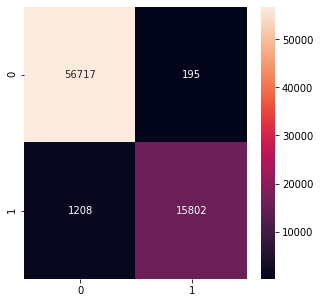

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['XGB'])], axis=0)

### **7. LDA**

In [ ]:
#create model QDA
LDA = LinearDiscriminantAnalysis()

In [ ]:
# fit model no training data
LDA.fit(train_features,  train_labels)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
prediction_test = LDA.predict(test_features)

score metrics for test_set:
accuracy score : 0.949
f1 score : 0.878
nmi score : 0.685
----------
Confusion matrix : 


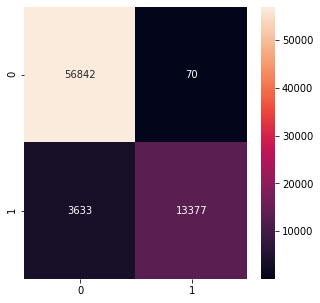

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LDA'])], axis=0)

### **8. QDA**

In [ ]:
#create model QDA
QDA = QuadraticDiscriminantAnalysis()

In [ ]:
# fit model no training data
QDA.fit(train_features, train_labels)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
prediction_test = QDA.predict(test_features)

score metrics for test_set:
accuracy score : 0.952
f1 score : 0.895
nmi score : 0.659
----------
Confusion matrix : 


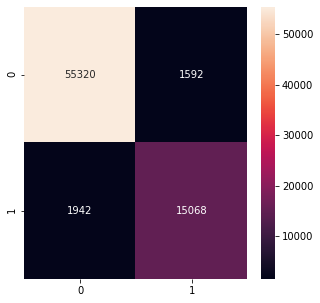

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['QDA'])], axis=0)

### **9. kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
prediction_test = knn.predict(test_features)

score metrics for test_set:
accuracy score : 0.998
f1 score : 0.996
nmi score : 0.982
----------
Confusion matrix : 


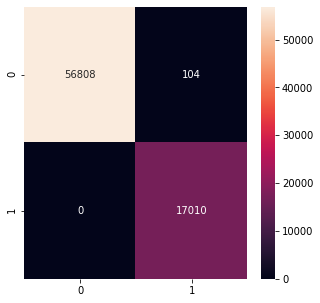

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['kNN'])], axis=0)

### **Evaluation des résultats**

Comparons les résultats obtenus avec les méthodes précédentes 

In [ ]:
score_metrics

,accuracy,f1,nmi
RF,0.999811,0.999589,0.996704
GaussianNB,0.946998,0.881266,0.632225
LR,0.967506,0.925974,0.753430
XGB,0.981021,0.957494,0.839660
LDA,0.949907,0.878419,0.685886
QDA,0.952193,0.895040,0.659155
kNN,0.998593,0.996952,0.982547


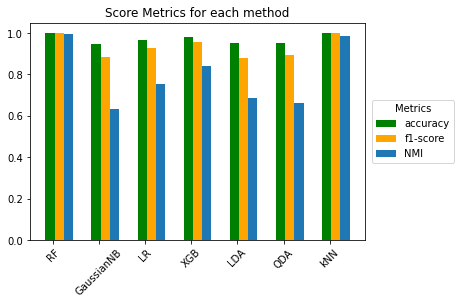

In [ ]:
plot_metrics(score_metrics)

**Conclusion application sur dataset rééchantilloné avec SMOTE:**

Avec l'oversampling nous remarquons que les valeurs des métriques d'évaluation de toutes les méthodes ont augumenté. les méthodes qui ont présenté de bons résultats sont KNN, RF, et XGBoost.

### **Undersampling avec RUS**

Les techniques de sous-échantillonage sont regroupées en trois catégories: Celles qui sélectionnent des exemples à conserver dans l’ensemble de données transformé, celles qui sélectionnent des exemples à supprimer et les hybrides qui combinent les deux types de méthodes. Nous allons utiliser la méthode 
**Random undersampling** de la deuxième famille des technique qui sélectionne aléatoirement les échantillons  à supprimer de la classe majoritaire.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


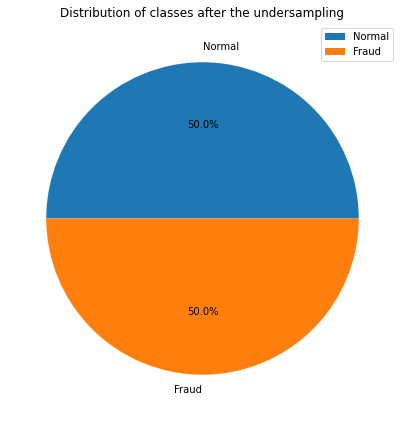

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
features, labels = rus.fit_resample(credit_features, credit_labels)
neg, pos = np.bincount(labels)
plt.figure(figsize=(7,8))
fig = plt.pie([neg, pos], labels = ['Normal', 'Fraud'], autopct=lambda x: str(round(x,2))+'%') 
fig = plt.legend() 
fig = plt.title('Distribution of classes after the undersampling')

In [ ]:
Counter(labels)  # on compte beaucoup moins de données

Counter({0: 492, 1: 492})

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                          labels,
                                                                          test_size=0.2, 
                                                                          random_state=42) 

###**1. Random Forest**

In [ ]:
#create RF model
rf = RandomForestClassifier(n_estimators=500, criterion='gini', 
                               min_samples_leaf=1, min_samples_split=2, 
                               random_state = 42, n_jobs = -1)  #n_jobs = -1 pour le parallélisme

In [ ]:
# Train the model on training data
%%time
rf.fit(train_features, train_labels)

CPU times: user 2.29 s, sys: 130 ms, total: 2.42 s
Wall time: 1.71 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#predection on test_set
prediction_test = rf.predict(test_features)

score metrics for test_set:
accuracy score : 0.923
f1 score : 0.920
nmi score : 0.622
----------
Confusion matrix : 


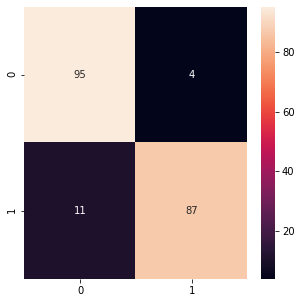

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
result_dict

{'accuracy': 0.9238578680203046,
 'f1': 0.9206349206349207,
 'nmi': 0.6223926243855158}

Afin de comparer les différentes méthodes que nous utiliserons ensuite on peut dès à présent construire un dataframe contenant les scores pour chacunes des méthodes :

In [ ]:
score_metrics = pd.DataFrame(result_dict, index= ['RF'])

In [ ]:
score_metrics

,accuracy,f1,nmi
RF,0.923858,0.920635,0.622393


###**2. Linear SVM**

In [ ]:
#create svm model
linear_svm = svm.SVC(kernel='linear')

In [ ]:
# Train the svm model on training data
%%time
linear_svm.fit(train_features, train_labels)

CPU times: user 18.4 ms, sys: 0 ns, total: 18.4 ms
Wall time: 19.7 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predection on test_set
prediction_test = linear_svm.predict(test_features)

score metrics for test_set:
accuracy score : 0.918
f1 score : 0.915
nmi score : 0.600
----------
Confusion matrix : 


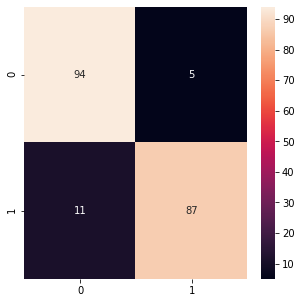

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LinSVM'])], axis=0)

###**3. Non Linear SVM**

In [ ]:
#create svm model
noLinear_svm = svm.SVC(kernel='poly', degree = 3)

In [ ]:
# Train the svm model on training data
%%time
noLinear_svm.fit(train_features, train_labels)

CPU times: user 18.2 ms, sys: 0 ns, total: 18.2 ms
Wall time: 24.9 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predection on test_set
prediction_test = noLinear_svm.predict(test_features)

score metrics for test_set:
accuracy score : 0.873
f1 score : 0.853
nmi score : 0.557
----------
Confusion matrix : 


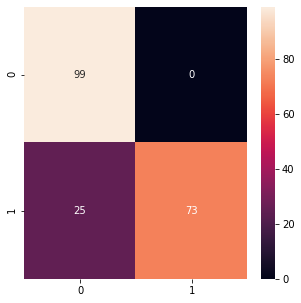

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['NonLinSVM'])], axis=0)

###**4. Bayesien Naïf**

In [ ]:
#model gaussien
gnb = GaussianNB()

In [ ]:
# Train the svm model on training data
%%time
gnb.fit(train_features, train_labels)

CPU times: user 1.43 ms, sys: 1.98 ms, total: 3.41 ms
Wall time: 2.68 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#predection on test_set
prediction_test = gnb.predict(test_features)

score metrics for test_set:
accuracy score : 0.908
f1 score : 0.901
nmi score : 0.597
----------
Confusion matrix : 


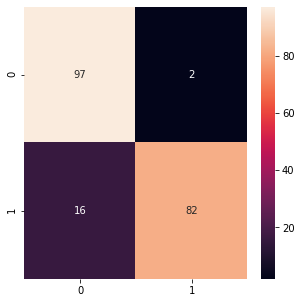

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['GaussianNB'])], axis=0)

### **5. Regression logistique**

In [ ]:
LR = LogisticRegressionCV(cv=5, random_state=0) 
# nous avons choisi d'entrainer le modèle avec une validation croisée pour améliorer les résultats

In [ ]:
# Train the svm model on training data
%%time
LR.fit(train_features, train_labels)

In [ ]:
prediction_test = LR.predict(test_features)

score metrics for test_set:
accuracy score : 0.928
f1 score : 0.925
nmi score : 0.645
----------
Confusion matrix : 


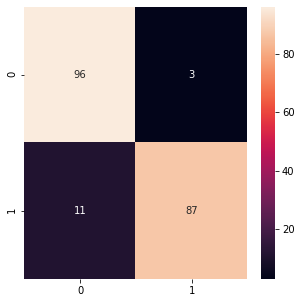

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LR'])], axis=0)

### **6. XGBOOST**

In [ ]:
#create model xgboost
xgb = XGBClassifier()

In [ ]:
# fit model no training data
xgb.fit(train_features,  train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
prediction_test = xgb.predict(test_features)

score metrics for test_set:
accuracy score : 0.918
f1 score : 0.915
nmi score : 0.600
----------
Confusion matrix : 


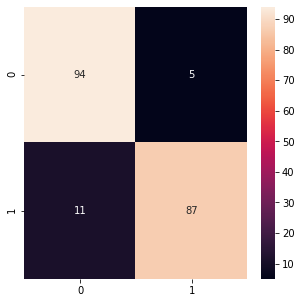

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['XGB'])], axis=0)

### **7. LDA**

In [ ]:
#create model QDA
LDA = LinearDiscriminantAnalysis()

In [ ]:
# fit model no training data
LDA.fit(train_features,  train_labels)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
prediction_test = LDA.predict(test_features)

score metrics for test_set:
accuracy score : 0.893
f1 score : 0.882
nmi score : 0.558
----------
Confusion matrix : 


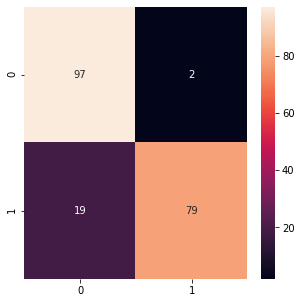

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LDA'])], axis=0)

### **8. QDA**

In [ ]:
#create model QDA
QDA = QuadraticDiscriminantAnalysis()

In [ ]:
# fit model no training data
QDA.fit(train_features, train_labels)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
prediction_test = QDA.predict(test_features)

score metrics for test_set:
accuracy score : 0.918
f1 score : 0.916
nmi score : 0.596
----------
Confusion matrix : 


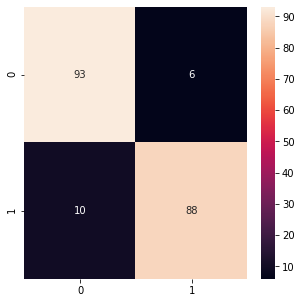

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['QDA'])], axis=0)

### **9. kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
prediction_test = knn.predict(test_features)

score metrics for test_set:
accuracy score : 0.923
f1 score : 0.920
nmi score : 0.622
----------
Confusion matrix : 


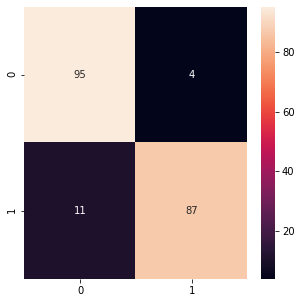

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['kNN'])], axis=0)

### **Evaluation des résultats**

Comparons les résultats obtenus avec les méthodes précédentes 

In [ ]:
score_metrics

,accuracy,f1,nmi
RF,0.923858,0.920635,0.622393
LinSVM,0.918782,0.915789,0.600765
NonLinSVM,0.873096,0.853801,0.557175
GaussianNB,0.908629,0.901099,0.597956
LR,0.928934,0.925532,0.645873
XGB,0.918782,0.915789,0.600765
LDA,0.893401,0.882682,0.558907
QDA,0.918782,0.916667,0.596679
kNN,0.923858,0.920635,0.622393


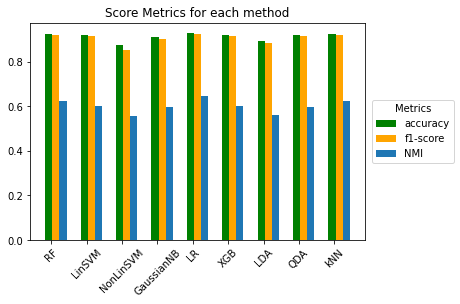

In [ ]:
plot_metrics(score_metrics)

**Conclusion application sur dataset rééchantilloné avec RUS:**

Dans l'undersampling c'est la Regression logistique, KNN, RF, et SVM linéaire qui ont montré de bons résultats de classement par rapport au autres méthodes cela est du à l'efficacité de ces méthodes quand il s'agit d'un jeu de données de petite taille.

# **Application 2 : Données relationnelles - CiteSeer** 

####**Chargement du jeu de données 'citeseer'**

In [ ]:
!gdown --id 1_xftxpDfy3q9XQvv2pT-p1BiT6UQvPDJ -q

In [ ]:
citeseer = scipy.io.loadmat('/content/citeseer.mat')
W = citeseer['W'] # np array

# data
X = citeseer['fea'] # np array 
# labels
labels = np.array([x[0] for x in citeseer['gnd']]) 

In [ ]:
print(X.shape)

(3327, 3703)


###**Fonction d'évaluation Accuracy, NMI, F-measure**

In [ ]:
def evaluate(y_true, y_pred, scoring_metric=['accuracy','f1', 'nmi'],
             verbose=True, cm=True):
  
    scores_dict = {'accuracy': accuracy_score,
                   'f1': f1_score,
                   'nmi': normalized_mutual_info_score}

    result_dict = {}
    for score in scoring_metric:
        if score in scores_dict.keys():
            if score == 'f1':
                result_dict[score] = scores_dict[score](y_true, y_pred, average='macro')
            else:
                result_dict[score] = scores_dict[score](y_true, y_pred)
        else:
            print('metric {} not implemented yet'.format(score))
        if verbose:
            print("{} score : {:.3f}".format(score, int(result_dict[score]*1000)/1000))
    if cm:
        return result_dict, metrics.confusion_matrix(y_true, y_pred)
    else:
        return result_dict

def plot_confusion(cm):
    print("Confusion matrix : ")
    fig, ax = plt.subplots(figsize=(5,5))
    fig = sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

##**Données : X (document-termes) - Applications des méthodes**

In [ ]:
#split on train and test set
train_features, test_features, train_labels, test_labels = train_test_split(X,
                                                                            labels,
                                                                            test_size=0.4, 
                                                                            random_state=42)

###**1. Random Forest**

In [ ]:
#create RF model
rf = RandomForestClassifier(n_estimators=500, criterion='gini', 
                               min_samples_leaf=1, min_samples_split=2, 
                               random_state = 42, n_jobs = -1)  #n_jobs = -1 pour le parallélisme

In [ ]:
# Train the model on training data
%%time
rf.fit(train_features, train_labels)

CPU times: user 21min 51s, sys: 734 ms, total: 21min 52s
Wall time: 11min 5s


In [ ]:
#predection on test_set
prediction_test = rf.predict(test_features)

score metrics for test_set:
accuracy score : 0.734
f1 score : 0.690
nmi score : 0.455
----------
Confusion matrix : 


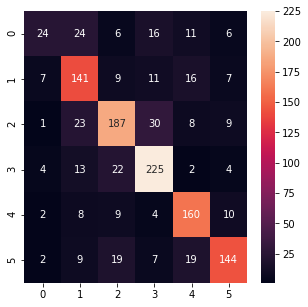

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.DataFrame(result_dict, index= ['RF'])

###**2. Linear SVM**

In [ ]:
#create svm model
linear_svm = svm.SVC(kernel='linear')

In [ ]:
# Train the svm model on training data
%%time
linear_svm.fit(train_features, train_labels)

CPU times: user 21min 46s, sys: 1.8 s, total: 21min 48s
Wall time: 21min 50s


In [ ]:
#predection on test_set
prediction_test = linear_svm.predict(test_features)

score metrics for test_set:
accuracy score : 0.678
f1 score : 0.655
nmi score : 0.384
----------
Confusion matrix : 


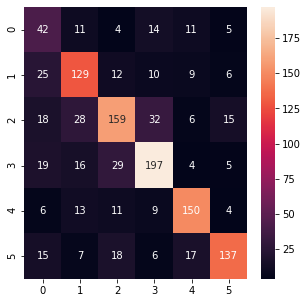

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LinSVM'])], axis=0)

###**3. Non Linear SVM**

In [ ]:
#create svm model
noLinear_svm = SVC(kernel='poly', degree = 3)

In [ ]:
# Train the svm model on training data
%%time
noLinear_svm.fit(train_features, train_labels)

CPU times: user 41 s, sys: 77.9 ms, total: 41.1 s
Wall time: 41.2 s


In [ ]:
#predection on test_set
prediction_test = noLinear_svm.predict(test_features)

score metrics for test_set:
accuracy score : 0.624
f1 score : 0.510
nmi score : 0.365
----------
Confusion matrix : 


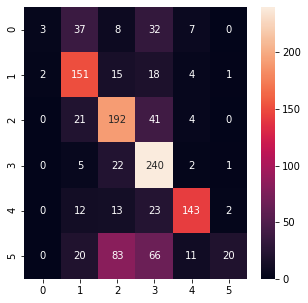

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['NonLinSVM'])], axis=0)

###**4. Bayesien Naïf**

In [ ]:
#model gaussien
gnb = GaussianNB()

In [ ]:
# Train the svm model on training data
%%time
gnb.fit(train_features, train_labels)

CPU times: user 89.1 ms, sys: 15.9 ms, total: 105 ms
Wall time: 110 ms


In [ ]:
#predection on test_set
prediction_test = gnb.predict(test_features)

score metrics for test_set:
accuracy score : 0.618
f1 score : 0.591
nmi score : 0.303
----------
Confusion matrix : 


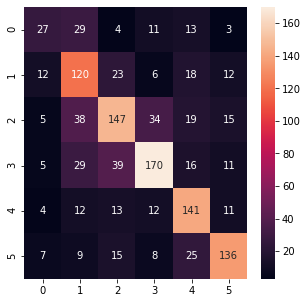

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['GaussianNB'])], axis=0)

### **5. Regression logistique**

In [ ]:
LR = LogisticRegressionCV(cv=5, random_state=0) 
# nous avons choisi d'entrainer le modèle avec une validation croisée pour améliorer les résultats

In [ ]:
# Train the svm model on training data
%%time
LR.fit(train_features, train_labels)

CPU times: user 53.6 s, sys: 21.1 s, total: 1min 14s
Wall time: 37.8 s


In [ ]:
prediction_test = LR.predict(test_features)

score metrics for test_set:
accuracy score : 0.728
f1 score : 0.683
nmi score : 0.453
----------
Confusion matrix : 


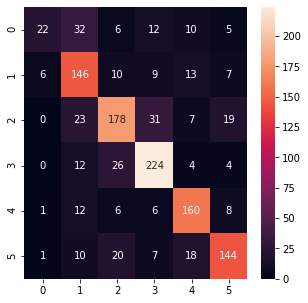

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LR'])], axis=0)

### **6. XGBOOST**

In [ ]:
#create model xgboost
xgb = XGBClassifier()

In [ ]:
# fit model no training data
xgb.fit(train_features,  train_labels)

In [ ]:
prediction_test = xgb.predict(test_features)

score metrics for test_set:
accuracy score : 0.694
f1 score : 0.660
nmi score : 0.402
----------
Confusion matrix : 


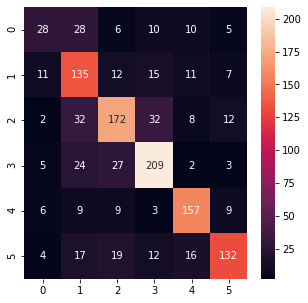

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['XGB'])], axis=0)

### **7. LDA**

In [ ]:
#create model QDA
LDA = LinearDiscriminantAnalysis()

In [ ]:
# fit model no training data
LDA.fit(train_features,  train_labels)

In [ ]:
prediction_test = LDA.predict(test_features)

score metrics for test_set:
accuracy score : 0.385
f1 score : 0.365
nmi score : 0.101
----------
Confusion matrix : 


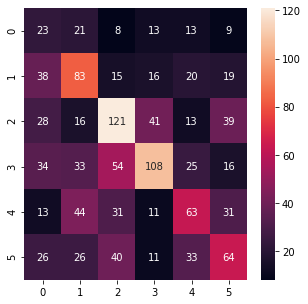

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LDA'])], axis=0)

### **8. QDA**

In [ ]:
#create model QDA
QDA = QuadraticDiscriminantAnalysis()

In [ ]:
# fit model no training data
QDA.fit(train_features, train_labels)

In [ ]:
prediction_test = QDA.predict(test_features)

score metrics for test_set:
accuracy score : 0.202
f1 score : 0.175
nmi score : 0.016
----------
Confusion matrix : 


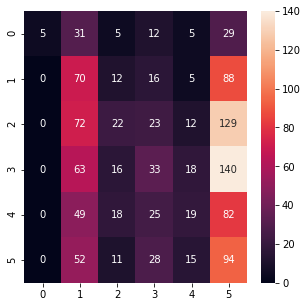

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

Tout comme avec le dataset `credit_card`, on décide d'entrainer le modèle avec une validation croisée.

####**QDA (validation croisée)**

score metrics for test_set:
accuracy score : 0.379
f1 score : 0.356
nmi score : 0.078
----------
Confusion matrix : 


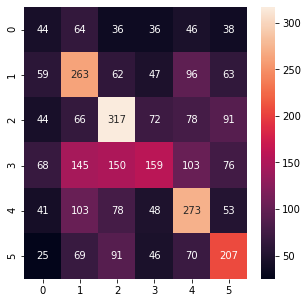

In [ ]:
QDA = LinearDiscriminantAnalysis()
prediction_cv_QDA = cross_val_predict(QDA, X, labels, cv=5)

print("score metrics for test_set:")
result_dict, cm = evaluate(labels, prediction_cv_QDA)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['QDA'])], axis=0)

### **9. kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
prediction_test = knn.predict(test_features)

score metrics for test_set:
accuracy score : 0.077
f1 score : 0.030
nmi score : 0.008
----------
Confusion matrix : 


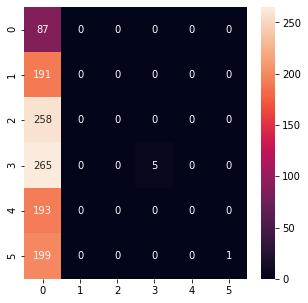

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['kNN'])], axis=0)


<font color='red'>**COMMENTAIRE**</font>

### **Evaluation des résultats**

Comparons les résultats obtenus avec les méthodes précédentes 

In [ ]:
score_metrics

,accuracy,f1,nmi
RF,0.734779,0.690059,0.455088
LinSVM,0.678899,0.655863,0.384797
NonLinSVM,0.624687,0.510996,0.365735
GaussianNB,0.618015,0.591199,0.303329
LR,0.728941,0.683934,0.453470
XGB,0.694746,0.660286,0.402726
LDA,0.385321,0.365518,0.101804
QDA,0.379621,0.356217,0.078365
kNN,0.077565,0.030375,0.008716


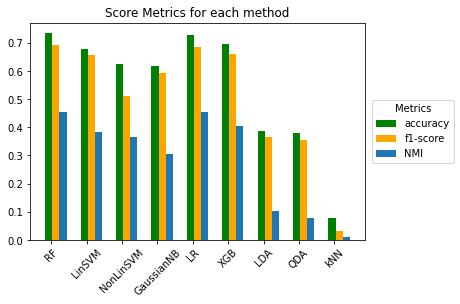

In [ ]:
plot_metrics(score_metrics)

Ces résultats nous montre que le taux des metriques pour les classifieurs *RF, LinSVM, XGB,et LR* est quasiment le même, nos ramrquons que l'accuracy est élevée pour ces méthodes, mais aussi nous avons *GaussianNB* qui est adaptée aux problèmatiques de classification de documents contrairement à la méthode KNN qui n'est pas du tout adaptée à la classification des matrices document-termes comme le montre les résultats des métriques.

## **Données M**

Construisons la matrice M

In [ ]:
D = np.sum(W, axis=0)
# np.any(D==0) # D ne contient pas de 0
Dinv = np.diag(1/D)
M = Dinv.dot(W).dot(X)

In [ ]:
M

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.2, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(M,
                                                                            labels,
                                                                            test_size=0.4, 
                                                                            random_state=42)

###**1. Random Forest**

In [ ]:
#create RF model
rf = RandomForestClassifier(n_estimators=500, criterion='gini', 
                               min_samples_leaf=1, min_samples_split=2, 
                               random_state = 42, n_jobs = -1)  #n_jobs = -1 pour le parallélisme

In [ ]:
# Train the model on training data
%%time
rf.fit(train_features, train_labels)

CPU times: user 18 s, sys: 105 ms, total: 18.1 s
Wall time: 9.54 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#predection on test_set
prediction_test = rf.predict(test_features)

score metrics for test_set:
accuracy score : 0.727
f1 score : 0.663
nmi score : 0.455
----------
Confusion matrix : 


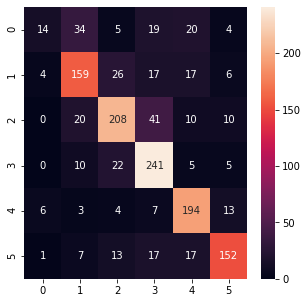

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.DataFrame(result_dict, index= ['RF'])

###**2. Linear SVM**

In [ ]:
#create svm model
linear_svm = svm.SVC(kernel='linear')

In [ ]:
# Train the svm model on training data
%%time
linear_svm.fit(train_features, train_labels)

CPU times: user 20.1 s, sys: 1.7 ms, total: 20.2 s
Wall time: 20.2 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predection on test_set
prediction_test = linear_svm.predict(test_features)

score metrics for test_set:
accuracy score : 0.670
f1 score : 0.633
nmi score : 0.375
----------
Confusion matrix : 


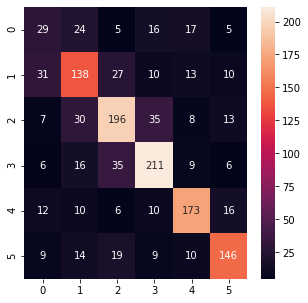

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LinSVM'])], axis=0)

###**3. Non Linear SVM**

In [ ]:
#create svm model
noLinear_svm = svm.SVC(kernel='poly', degree = 3)

In [ ]:
# Train the svm model on training data
%%time
noLinear_svm.fit(train_features, train_labels)

CPU times: user 38.2 s, sys: 16.3 ms, total: 38.2 s
Wall time: 38.2 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predection on test_set
prediction_test = noLinear_svm.predict(test_features)

score metrics for test_set:
accuracy score : 0.604
f1 score : 0.544
nmi score : 0.363
----------
Confusion matrix : 


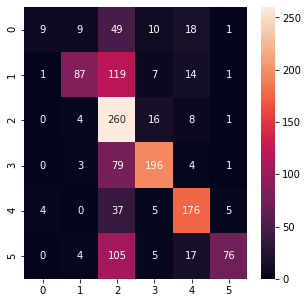

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['NonLinSVM'])], axis=0)

###**4. Bayesien Naïf**

In [ ]:
#model gaussien
gnb = GaussianNB()

In [ ]:
# Train the svm model on training data
%%time
gnb.fit(train_features, train_labels)

CPU times: user 81.7 ms, sys: 15 ms, total: 96.7 ms
Wall time: 100 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#predection on test_set
prediction_test = gnb.predict(test_features)

score metrics for test_set:
accuracy score : 0.658
f1 score : 0.616
nmi score : 0.354
----------
Confusion matrix : 


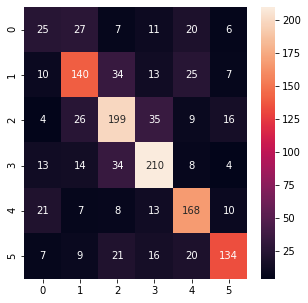

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['GaussianNB'])], axis=0)

### **5. Regression logistique**

In [ ]:
LR = LogisticRegressionCV(cv=5, random_state=0) 
# nous avons choisi d'entrainer le modèle avec une validation croisée pour améliorer les résultats

In [ ]:
# Train the svm model on training data
%%time
LR.fit(train_features, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CPU times: user 2min 49s, sys: 2min 11s, total: 5min
Wall time: 2min 32s


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
prediction_test = LR.predict(test_features)

score metrics for test_set:
accuracy score : 0.725
f1 score : 0.664
nmi score : 0.446
----------
Confusion matrix : 


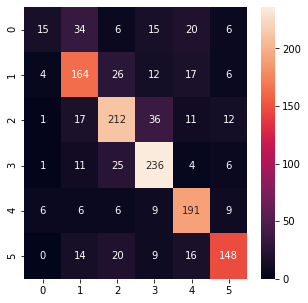

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LR'])], axis=0)

### **6. XGBOOST**

In [ ]:
#create model xgboost
xgb = XGBClassifier()

In [ ]:
# fit model no training data
xgb.fit(train_features,  train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
prediction_test = xgb.predict(test_features)

score metrics for test_set:
accuracy score : 0.711
f1 score : 0.659
nmi score : 0.427
----------
Confusion matrix : 


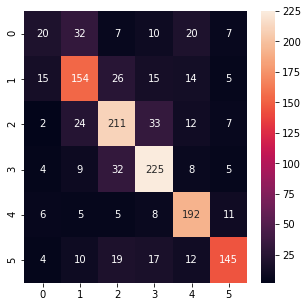

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['XGB'])], axis=0)

### **7. LDA**

In [ ]:
#create model QDA
LDA = LinearDiscriminantAnalysis()

In [ ]:
# fit model no training data
LDA.fit(train_features,  train_labels)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
prediction_test = LDA.predict(test_features)

score metrics for test_set:
accuracy score : 0.544
f1 score : 0.517
nmi score : 0.217
----------
Confusion matrix : 


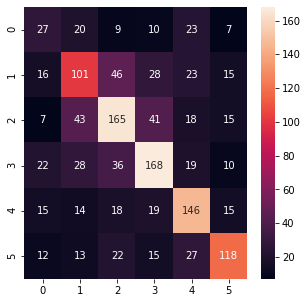

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['LDA'])], axis=0)

### **8. QDA**

In [ ]:
#create model QDA
QDA = QuadraticDiscriminantAnalysis()

In [ ]:
# fit model no training data
QDA.fit(train_features, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
prediction_test = QDA.predict(test_features)

score metrics for test_set:
accuracy score : 0.178
f1 score : 0.202
nmi score : 0.122
----------
Confusion matrix : 


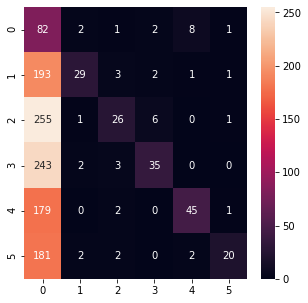

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

Tout comme avec le dataset `credit_card`, on décide d'entrainer le modèle avec une validation croisée.

####**QDA (validation croisée)**

score metrics for test_set:
accuracy score : 0.379
f1 score : 0.356
nmi score : 0.078
----------
Confusion matrix : 


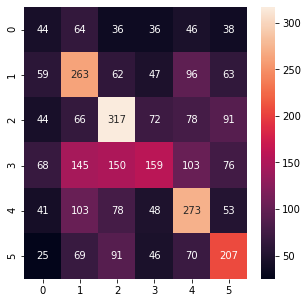

In [ ]:
QDA = LinearDiscriminantAnalysis()
prediction_cv_QDA = cross_val_predict(QDA, X, labels, cv=5)

print("score metrics for test_set:")
result_dict, cm = evaluate(labels, prediction_cv_QDA)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['QDA'])], axis=0)

### **9. kNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
prediction_test = knn.predict(test_features)

score metrics for test_set:
accuracy score : 0.598
f1 score : 0.552
nmi score : 0.339
----------
Confusion matrix : 


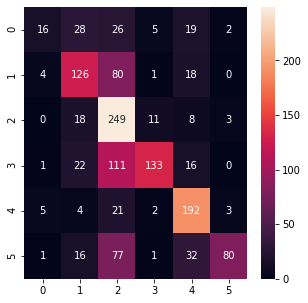

In [ ]:
print("score metrics for test_set:")
result_dict, cm = evaluate(test_labels, prediction_test)
print(10*'-')
plot_confusion(cm)

In [ ]:
score_metrics = pd.concat([score_metrics, pd.DataFrame(result_dict, index= ['kNN'])], axis=0)

### **Evaluation des résultats**

Comparons les résultats obtenus avec les méthodes précédentes 

In [ ]:
score_metrics

,accuracy,f1,nmi
RF,0.727273,0.663697,0.455910
LinSVM,0.670924,0.633368,0.375399
NonLinSVM,0.604057,0.544332,0.363419
GaussianNB,0.658152,0.616845,0.354907
LR,0.725770,0.664067,0.446903
XGB,0.711495,0.659389,0.427247
LDA,0.544703,0.517006,0.217305
QDA,0.379621,0.356217,0.078365
kNN,0.598047,0.552550,0.339423


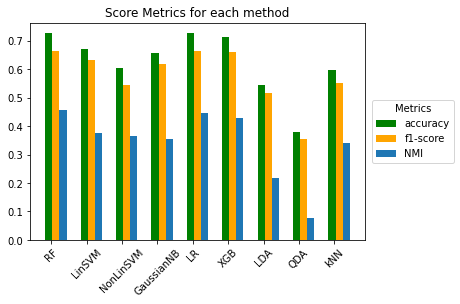

In [ ]:
plot_metrics(score_metrics)

Selon les graphe obtenu ci dessus, nous ramarquons que le taux d'accuracy et f1-score est plus élevé pour les méthodes *RF, LR et XGB*, ainsi une faible *NMI* pour la méthode QDA, cette dernières est la moins adaptée à la classfication des données de la mtrice M.

**Conclusion :** \
L'application de ces différentes méthodes de classification nous aura permis de mettre en avant les forces et les faiblessesde chacunes sur des datasets de natures différentes.